In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

This example uses matplotlib 3.0

In [2]:
#%matplotlib widget
import sys
print("Python version is {} \n".format(sys.version))
print("Matplotlib version is {} \n".format(mpl.__version__))
print("Matplotlibrc file is {}\n".format(mpl.matplotlib_fname()))

Python version is 3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:36:39) [GCC 10.4.0] 

Matplotlib version is 3.6.0 

Matplotlibrc file is matplotlibrc



and the matplotlibrc file from 
https://github.com/mpmdean/matplotlibrc
please suggest improvements

## A few notes

* All fields are using latex by default -- this avoid non-uniformity when using latex in some labels. 

* Using a uniform style is very important for an attractive manuscript. Try to avoid ad-hoc changes to the settings. 

* If you feel that there is a desirable change, consider applying it to the whole manuscript, preferably by setting some edits to the rc file right at the start of the script/notebook. e.g. mpl.rc('font', size=10). 

## Create figure

* The width of a figure should always be set to the real physical column width. e.g. 3+3/8 inches for a PRL column. This will mean that fonts appear on the page in the correct size.

* Gridspec and subplots_adjust are useful to set the precise location of panels.

* Including 2-4 minor ticks per major tick is usually good.

* Putting the colorbar on separate axes facilities better control over its location. 

* Saving in pdf creates vector graphics and fast performance within pdflatex.

This example shows a useful custom colormap that has white as its minimum color and a smooth range of colors for finite numbers. We thank Yao Shen for help with this example.

In [3]:
white_turbo_colormap = mpl.colors.ListedColormap(np.load('white_turbo.npy'))

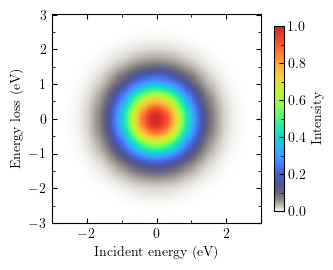

In [4]:
X, Y = np.meshgrid(np.linspace(-3, 3, 200),
                   np.linspace(-3, 3, 200))

Z = np.exp(-(X**2+Y**2))

fig, ax = plt.subplots(figsize=(3+3/8, 3))

art = ax.pcolor(X, Y, Z, shading='auto', cmap=white_turbo_colormap,
                vmin=0, vmax=1,
                alpha=1, linewidth=0, rasterized=True)
cb = plt.colorbar(art, ax=ax, shrink=0.8)

ax.set_xlabel('Incident energy (eV)')
ax.set_ylabel('Energy loss (eV)')
cb.set_label('Intensity')

ax.set_aspect('equal')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
cb.set_ticks(ticker.MultipleLocator(0.2))
cb.ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

fig.savefig('ex_21_new_colormap.pdf', dpi=1200)